# EEM 314 Veri Madenciliğine Giriş
# Uygulama 1 : Benzerlik ya da Uzaklık Metriklerinin İncelenmesi 
---
Bu çalışmamızda veri madenciliğinde kullanılan temel benzerlik ve uzaklık metrikleri ile
ilgili fonksiyonları yazıp hesaplamalarını yapacağız.

Kullanıcağımız kütüphaneleri çağıralım

In [5]:
import numpy as np
import pandas as pd

Bu not defterinde hesaplayacağımız benzerlik ve uzaklık metrikleri şekildeki metriklerdir.

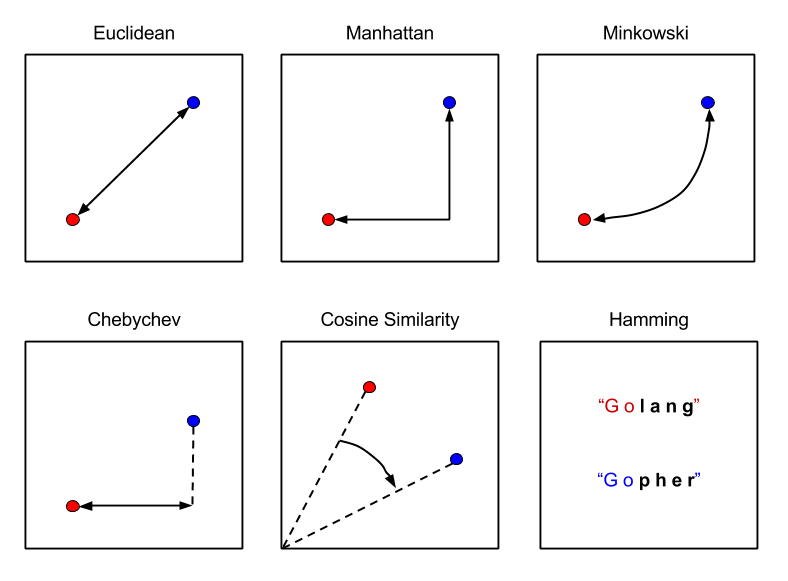


## Euclidean Distance

Öklid uzayındaki iki nokta arasındaki Öklid mesafesi, iki nokta arasındaki bir doğru parçasının uzunluğudur. Pisagor teoremi kullanılarak noktaların Kartezyen koordinatlarından hesaplanabilir, bu nedenle bazen Pisagor mesafesi olarak adlandırılır. 

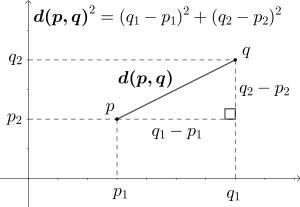


$d(x,y) = \sqrt{\sum_{i = 0}^n \ (x_k -y_k)^2 }   $

$n$ : Öznitelik sayısı

$x_k \ ve \ y_k:$ k'inci öznitelikler

In [ ]:
def euclidean_distance(noktalar,noktalar_isim):
  #Euclidean Distance'ı hesaplayalım
  uzaklıklar = []
  for index,nokta in enumerate(noktalar):
    noktalar_copy = noktalar.copy()
    but_uzaklık = []
    for ind,nok in enumerate(noktalar_copy):
      uzaklık = 0
      n = len(nok)
      for j in range(n):
        uzaklık += np.square(nokta[j]-nok[j])
      uzaklık = np.sqrt(uzaklık)
      but_uzaklık.append(uzaklık)
    uzaklıklar.append(but_uzaklık)
  tablo = pd.DataFrame(uzaklıklar, noktalar_isim, noktalar_isim)
  return tablo
p1 = [0,2]
p2 = [2,0]
p3 = [3,1]
p4 = [5,1]
noktalar = [p1,p2,p3,p4]
noktalar_isim = ["p1","p2","p3","p4"]
print("Euclidean Distance")
euclidean_distance(noktalar,noktalar_isim)

Euclidean Distance


,p1,p2,p3,p4
p1,0.000000,2.828427,3.162278,5.099020
p2,2.828427,0.000000,1.414214,3.162278
p3,3.162278,1.414214,0.000000,2.000000
p4,5.099020,3.162278,2.000000,0.000000


## Manhattan Distance

Manhattan mesafesi, iki gerçek değerli vektör arasındaki mesafeyi hesaplar.

Satranç tahtası veya şehir blokları gibi nesneleri tek tip bir ızgarada tanımlayan vektörler için belki daha kullanışlıdır.
Örneğin,bir taksinin şehir blokları arasında gideceği en kısa yol (ızgara üzerindeki koordinatlar).

Bir tamsayı özellik uzayında iki vektör için Öklid mesafesi yerine Manhattan mesafesini hesaplamak mantıklı olabilir.
Manhattan mesafesi, iki vektör arasındaki mutlak farkların toplamı olarak hesaplanır.

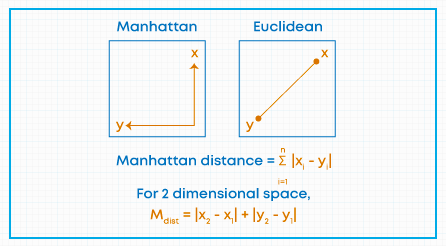

In [ ]:
def manhattan_distance(noktalar,noktalar_isim):
  #Euclidean Distance'ı hesaplayalım
  uzaklıklar = []
  for index,nokta in enumerate(noktalar):
    noktalar_copy = noktalar.copy()
    but_uzaklık = []
    for ind,nok in enumerate(noktalar_copy):
      uzaklık = 0
      n = len(nok)
      for j in range(n):
        uzaklık += abs(nokta[j]-nok[j])
      but_uzaklık.append(uzaklık)
    uzaklıklar.append(but_uzaklık)
  tablo = pd.DataFrame(uzaklıklar, noktalar_isim, noktalar_isim)
  return tablo
p1 = [0,2]
p2 = [2,0]
p3 = [3,1]
p4 = [5,1]
noktalar = [p1,p2,p3,p4]
noktalar_isim = ["p1","p2","p3","p4"]
print("Manhattan Distance")
manhattan_distance(noktalar,noktalar_isim)

Manhattan Distance


,p1,p2,p3,p4
p1,0,4,4,6
p2,4,0,2,4
p3,4,2,0,2
p4,6,4,2,0


## Minkowski Distance

Minkowski mesafesi, iki gerçek değerli vektör arasındaki mesafeyi hesaplar.
Öklid ve Manhattan mesafe ölçülerinin bir genellemesidir ve farklı mesafe ölçülerinin hesaplanmasına izin veren "sıra" veya "p" adı verilen bir parametre ekler.

p = 1: Manhattan mesafesi.

p = 2: Öklid mesafesi.

Ara değerler, iki ölçü arasında kontrollü bir denge sağlar.
Ayarlanabilen bir hiperparametre "p" aracılığıyla gerçek değerli vektörler için kullanılan mesafe ölçümü türü üzerinde kontrol sağladığından, mesafe ölçümlerini kullanan bir makine öğrenimi algoritmasını uygularken Minkowski mesafesinin kullanılması yaygındır.

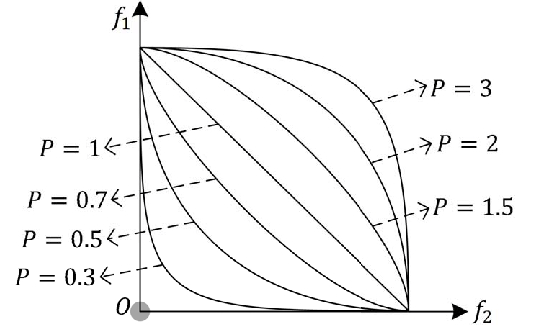


$d(x,y) = ({\sum_{i = 0}^n \ |x_k -y_k|^r })^(1/r)   $

$r$ : Parametre

$n$ : Öznitelik sayısı

$x_k \ ve \ y_k:$ k'inci öznitelikler

In [ ]:
def minkowski_distance(noktalar,noktalar_isim):
  r_ler = [1,2,300]
  tablo_1 = pd.DataFrame()
  tablo_2 = pd.DataFrame()
  tablo_300 = pd.DataFrame()
  for L in r_ler:
    uzaklıklar = []
    for index,nokta in enumerate(noktalar):
      noktalar_copy = noktalar.copy()
      but_uzaklık = []
      for ind,nok in enumerate(noktalar_copy):
        uzaklık = 0
        r = len(nok)
        for j in range(r):
          uzaklık += (abs(nokta[j]-nok[j])**L)
        but_uzaklık.append(uzaklık**(1/L))
      uzaklıklar.append(but_uzaklık)
    if L == 1:
      tablo_1 = pd.DataFrame(uzaklıklar, noktalar_isim, noktalar_isim)
    elif L == 2:
      tablo_2 = pd.DataFrame(uzaklıklar, noktalar_isim, noktalar_isim)
    else:
      tablo_300 = pd.DataFrame(uzaklıklar, noktalar_isim, noktalar_isim)
  return tablo_1,tablo_2,tablo_300

p1 = [0,2]
p2 = [2,0]
p3 = [3,1]
p4 = [5,1]
noktalar = [p1,p2,p3,p4]
noktalar_isim = ["p1","p2","p3","p4"]
minkowski = minkowski_distance(noktalar,noktalar_isim)
print("Minkowski Distance")
print(minkowski[0])
print(minkowski[1])
print(minkowski[2])

Minkowski Distance
     p1   p2   p3   p4
p1  0.0  4.0  4.0  6.0
p2  4.0  0.0  2.0  4.0
p3  4.0  2.0  0.0  2.0
p4  6.0  4.0  2.0  0.0
          p1        p2        p3        p4
p1  0.000000  2.828427  3.162278  5.099020
p2  2.828427  0.000000  1.414214  3.162278
p3  3.162278  1.414214  0.000000  2.000000
p4  5.099020  3.162278  2.000000  0.000000
          p1        p2        p3   p4
p1  0.000000  2.004626  3.000000  5.0
p2  2.004626  0.000000  1.002313  3.0
p3  3.000000  1.002313  0.000000  2.0
p4  5.000000  3.000000  2.000000  0.0


## Cosine Similarity

Kosinüs mesafesi ve Kosinüs Benzerlik metriği, esas olarak iki veri noktası arasındaki benzerlikleri bulmak için kullanılır. Veri noktaları arasındaki kosinüs mesafesi arttıkça, kosinüs benzerliği veya benzerlik miktarı azalır ve bunun tersi de geçerlidir. Bu nedenle, birbirine daha yakın Noktalar, birbirinden uzak noktalardan daha benzerdir. 

Yani Cosine Similarity 0'a yaklaştıkça iki noktanın birbirine benzerliği artıyor,1'e yaklaştıkça azalıyor.

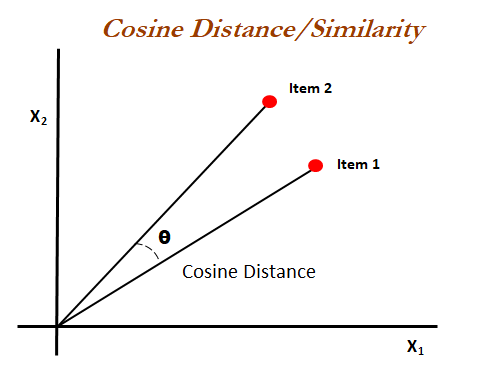


$cos(d1,d2) = \ <d_1,d_2> / \ ||d_1|| \ ||d_2|| $

$d_1 \ ve \ d_2$ : Vektör

In [ ]:
def cos_sim(d1,d2):
  vector1 = np.array(d1)
  vector2 = np.array(d2)
  dot_product = sum([d1[i]*d2[i] for i in range(len(d1))])
  mag1 = sum([d1[i]*d1[i] for i in range(len(d1))])**(1/2)
  mag2 = sum([d2[i]*d2[i] for i in range(len(d2))])**(1/2)
  return (dot_product/(mag1*mag2))

d1 = [3,2,0,5,0,0,0,2,0,0]
d2 = [1,0,0,0,0,0,0,1,0,2]
print("Cosine Similarity => cos( d1, d2 )= <d1,d2> / ||d1|| ||d2||=",cos_sim(d1,d2))

Cosine Similarity => cos( d1, d2 )= <d1,d2> / ||d1|| ||d2||= 0.314970394174356


## Correlation

Korelasyon, iki nicel değişken (ör. Boy, ağırlık) arasındaki doğrusal ilişkinin gücünün bir ölçüsü olan bir terimdir.

Pozitif korelasyon, her iki değişkenin aynı yönde hareket ettiği iki değişken arasındaki bir ilişkidir.Bu, bir değişken artarken diğeri arttığında ve tersi durumdur. 

Negatif korelasyon, bir değişkenin diğeri azaldıkça arttığı ve bunun tersinin de geçerli olduğu bir ilişkidir.

italik metin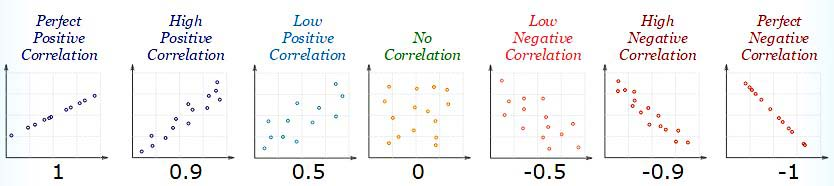

$corr(x,y) = \frac {Covarience(x,y)}{StandartDeviation(x)*StandartDeviation(y)} =\frac {S_{xy}}{S_x S_y}  $

In [ ]:
def corr(x,y):
  x_mean = (1/len(y))*sum(x)
  x_std = np.sqrt(sum([(x[i]-x_mean)**2 for i in range(len(x))])/(len(x)-1))
  y_mean = (1/len(y))*sum(y)
  y_std = np.sqrt(sum([(y[i]-y_mean)**2 for i in range(len(y))])/(len(y)-1))
  coveriance = sum([(y[i]-np.mean(y))*(x[i]-np.mean(x)) for i in range(len(y))])/(len(y)-1)
  corel = coveriance/(x_std*y_std)
  return corel

x = [-3, -2, -1, 0, 1, 2, 3]
y = [9, 4, 1, 0, 1, 4, 9]
print("Correlation => corr(x,y) =",corr(x,y))

Correlation => corr(x,y) = 0.0


## Hamming Distance

Hamming mesafesi, iki ikili veri dizisini karşılaştırmak için bir ölçüdür. Eşit uzunluktaki iki ikili dizgiyi karşılaştırırken, Hamming mesafesi, iki bitin farklı olduğu bit konumlarının sayısıdır.

İki dizge arasındaki Hamming mesafesi, a ve b, d (a, b) olarak belirtilir.

İki dizge arasındaki Hamming mesafesini hesaplamak için ve XOR(Aynıysa 0,farklıysa 1) işlemini gerçekleştiririz (a⊕ b) ve sonra sonuç dizisindeki toplam 1 sayısını sayarız.

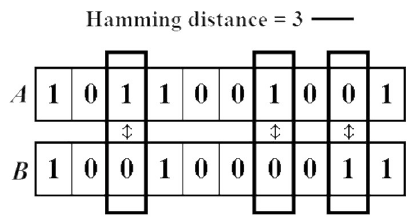

In [18]:
def hamming_distance(listeler,listeler_isim):
  hamming = []
  for ind,liste in enumerate(listeler):
    hamming_liste = []
    for idx,dig_liste in enumerate(listeler):
      if len(liste) == len(dig_liste):
        hamming_liste.append(sum([int(liste[i]!=dig_liste[i]) for i in range(len(liste))]))
      else:
        hamming_liste.append("X")
    hamming.append(hamming_liste)
  tablo = pd.DataFrame(hamming, listeler_isim, listeler_isim)          
  return tablo
d1 = [0,1,1,0,1,0,1,0]
d2 = [1,0,0,1,1,0,1,1]
d3 = [0,1,0,1,1,1,0,0]
listeler = [d1,d2,d3]
listeler_isim = ["d1","d2","d3"]
hamming_distance(listeler,listeler_isim)

,d1,d2,d3
d1,0,5,4
d2,5,0,5
d3,4,5,0


## Chebyshev distance

Genellikle matematikte "maksimum metrik" olarak bilinen Chebyshev mesafe hesaplaması, iki nokta arasındaki mesafeyi eksen değerlerinden herhangi biri üzerindeki maksimum fark olarak ölçer. 

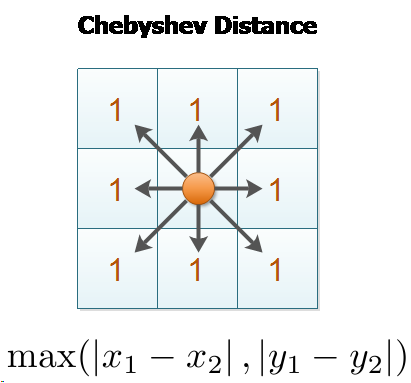



Örneğin aşağıdaki resimde kırmızı noktaların x değerlerini çıkarırsak 2-0=2, ve y değerlerini çıkarırsak is 3-0=3.İki fark arasındaki en büyük değer 3'tür.Bu nedenle Chebyshev Distance bu örnekte 3'tür.

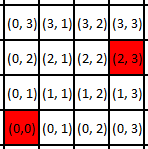

In [7]:
def chebyshev_distance(listeler,listeler_isim):
  chebyshev = []
  for ind,liste in enumerate(listeler):
    chebyshev_liste = []
    for idx,dig_liste in enumerate(listeler):
      if len(liste) == len(dig_liste):
        chebyshev_liste.append(max([abs(liste[i]-dig_liste[i]) for i in range(len(liste))]))
    chebyshev.append(chebyshev_liste)
  tablo = pd.DataFrame(chebyshev, listeler_isim, listeler_isim)          
  return tablo
d1 = [70,40]
d2 = [330,220]
listeler = [d1,d2]
listeler_isim = ["d1","d2"]
chebyshev_distance(listeler,listeler_isim)

,d1,d2
d1,0,260
d2,260,0


Bir satranç tahtasındaki iki boşluk arasındaki Chebyshev mesafesi, bir şahın aralarında hareket etmek için ihtiyaç duyduğu minimum hamle sayısını verir. Bunun nedeni, bir şahın çapraz olarak hareket edebilmesidir, böylece bir sıraya veya sütuna paralel daha küçük mesafeyi kaplayan atlamalar, daha büyük olanı kaplayan sıçramalara etkili bir şekilde emilir. Yukarıda, her karenin f6 karesinden Chebyshev mesafeleri vardır.

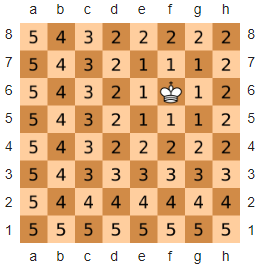

## Correlation vs Cosine vs Euclidean Distance

In [ ]:
x = [1, 2, 4, 3, 0, 0, 0]
y = [1, 2, 3, 4, 0, 0, 0]
y_s = [i*2 for i in y]
y_t = [i+5 for i in y]
noktalar_isim = ["x","y"]
print("x,y =",cos_sim(x,y),"x,y_s =",cos_sim(x,y_s),"x,y_t =",cos_sim(x,y_t))
print("x,y =",corr(x,y),"x,y_s =",corr(x,y_s),"x,y_t =",corr(x,y_t))
print("x,y =",euclidean_distance([x,y],["x","y"])['x']['y'],"x,y_s =",euclidean_distance([x,y_s],["x","y_s"])['x']['y_s'],"x,y_t =",euclidean_distance([x,y_t],["x","y_t"])['x']['y_t'])

x,y = 0.9666666666666667 x,y_s = 0.9666666666666667 x,y_t = 0.8258792301131205
x,y = 0.9363636363636363 x,y_s = 0.9363636363636363 x,y_t = 0.9363636363636364
x,y = 1.4142135623730951 x,y_s = 5.830951894845301 x,y_t = 13.30413469565007


***Kaynaklar***

https://static.packt-cdn.com/products/9781785882104/graphics/e1600b1b-46d6-4e39-9777-403a8d264594.png

https://www.researchgate.net/profile/Gary-Yen/publication/326719682/figure/fig2/AS:827755994292224@1574363816380/Example-of-different-Minkowski-distance-contour-curves-when-the-value-of-P-alters.png

https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png

https://www.aplustopper.com/wp-content/uploads/2017/05/Correlation-1.jpg

https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/01130416/june-30-hierarchical-clustering-infograph-for-blog-4.png

https://www.researchgate.net/profile/Fredrick-Ishengoma/publication/264978395/figure/fig1/AS:295895569584128@1447558409105/Example-of-Hamming-Distance.png

https://chris3606.github.io/GoRogue/images/measuring_distance/chebyshev_distance_def.PNG